Warning in <TInterpreter::ReadRootmapFile>: class  PlotUtils::BeamAngleXUniverse<PlotUtils::DefaultCVUniverse> found in libG__PlotUtilsDict.so  is already in libplotutils.dylib 
Warning in <TInterpreter::ReadRootmapFile>: class  PlotUtils::BeamAngleYUniverse<PlotUtils::DefaultCVUniverse> found in libG__PlotUtilsDict.so  is already in libplotutils.dylib 
Warning in <TInterpreter::ReadRootmapFile>: class  PlotUtils::ChainWrapper found in libG__PlotUtilsDict.so  is already in libplotutils.dylib 
Warning in <TInterpreter::ReadRootmapFile>: class  PlotUtils::DefaultCVUniverse found in libG__PlotUtilsDict.so  is already in libplotutils.dylib 
Warning in <TInterpreter::ReadRootmapFile>: class  PlotUtils::FluxUniverse<PlotUtils::DefaultCVUniverse> found in libG__PlotUtilsDict.so  is already in libplotutils.dylib 
Warning in <TInterpreter::ReadRootmapFile>: class  PlotUtils::GenieUniverse<PlotUtils::DefaultCVUniverse> found in libG__PlotUtilsDict.so  is already in libplotutils.dylib 
Warning in

tried to load libPlotutils.so
Welcome to JupyROOT 6.27/01
/Users/abashyal/Argonne_Stuff/trace_io
Total number of readonly acceses  483
Total number of read-write access  1
Total number of files created  1
min and max transfer rate for readonly access  6e-06 0.060947
min and max transfer rate for read-write access  0.000288 0.000288
{3, 4, 5}


(array([134.,  52.,  50., ...,   0.,   0.,   1.]),
 array([6.00000000e-06, 3.44107226e-05, 6.28214452e-05, ...,
        6.08901786e-02, 6.09185893e-02, 6.09470000e-02]),
 <BarContainer object of 2145 artists>)

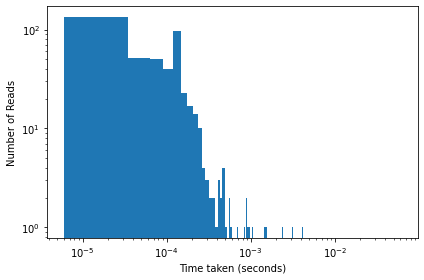

In [23]:
import os,sys
import matplotlib.pyplot as plt
import ROOT

curr_dir = os.getcwd()
print(curr_dir)
_file = "dump_trace_no_token_w_timestamp.txt"
_hdf5_file = "blaa.h5"

f = open(_file,'r')

line_counter=0
index_file_open=0
index_file_close=0
file_open_index = -999
#this number 3 comes from : open("blaa.h5", O_RDWR|O_CREAT, 0644)   = 3
#different ways files/objects are open:
rd_only = "O_RDONLY" #READONLY
readwrite = "O_RDWR" #READWRITE
create = "O_CREAT"   #CREATE

#Get the index numbers for different processes
#THIS FILE ALSO HAS THE TIME STAMP WHICH MAKES THINGS INTERESTING....WE CAN LOOK AT THE I/O RATE FOR EACH SYS CALL
#PROCESSES
""""
for line in f:
    if _hdf5_file in line:
        if "open" in line:
            #print(line_counter,"\n",line)
            index_file_open = line_counter
            new_line = line.split("=")
            print(new_line[0]," ",new_line[1])
            num = new_line[1].replace(" ","")
            num = num.replace("\n","")
            
"""

#list to save the system call indexes when opening files
list_open_lines={"read-only":[],
                 "read-write":[],
                 "create":[]
}
#list to save the I/O rate when doing the I/O
list_open_t_rate={"read-only":[],
                 "read-write":[],
                 "create":[]
}
f.seek(0)
for line in f:
    if "open" in line:
        new_line = line.split("=")
        num = new_line[1].replace(" ","")
        num = num.replace("\n","")
        if "Nosuchfile" in num:
            continue
        #print(new_line[1])
        #need to separate into int_num and the I/O rate
        if "<" not in num and ">" not in num:
            continue
        temp_line = new_line[1].replace("\n","")
        temp_line = temp_line.replace(" ","")

        list_temp_line = list(temp_line)
        s_index = list_temp_line.index("<")
        s_end = list_temp_line.index(">")
        t_rate = "" #we want to save the transfer rate somewhere....
        for i in range(s_index+1,s_end):
            t_rate += list_temp_line[i]
        proc_index = list_temp_line[s_index-1]
        
        try:
            int_num = int(proc_index) #we just want to consider the instances where opening something was successful
            f_t_rate = float(t_rate)
        except:
            continue
        if rd_only in line:
            list_open_lines["read-only"].append(int_num)
            list_open_t_rate["read-only"].append(f_t_rate)
        if readwrite in line:
            list_open_lines["read-write"].append(int_num)
            list_open_t_rate["read-write"].append(f_t_rate)
        if create in line:
            list_open_lines["create"].append(int_num)
            list_open_t_rate["create"].append(f_t_rate)
            
            


#now the categories of different things....
print("Total number of readonly acceses ",len(list_open_lines["read-only"]))
print("Total number of read-write access ",len(list_open_lines["read-write"]))
print("Total number of files created ",len(list_open_lines["create"]))

print("min and max transfer rate for readonly access ",min(list_open_t_rate["read-only"]),max(list_open_t_rate["read-only"]))
print("min and max transfer rate for read-write access ",min(list_open_t_rate["read-write"]),max(list_open_t_rate["read-write"]))

#NOW TO CATEGORIZE THE DIFFERENT KINDS OF ACCESSES
set_readonly = set(list_open_lines["read-only"])
print(set_readonly)


#I think we can see the distribution of the transfer rate for the read-only


fig, axs = plt.subplots(1, sharey=True, tight_layout=True)
plt.yscale("log")
plt.xscale("log")
axs.set_xlabel("Time taken (seconds)")
axs.set_ylabel("Number of Reads")
axs.hist(list_open_t_rate["read-only"], bins='auto')



{3: 78, 4: 244, 5: 161}
78


(array([45.,  9., 15.,  3.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  2.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([7.00000000e-06, 7.98333333e-05, 1.52666667e-04, 2.25500000e-04,
        2.98333333e-04, 3.71166667e-04, 4.44000000e-04, 5.16833333e-04,
        5.89666667e-04, 6.62500000e-04, 7.35333333e-04, 8.08166667e-04,
        8.81000000e-04, 9.53833333e-04, 1.02666667e-03, 1.09950000e-03,
        1.17233333e-03, 1.24516667e-03, 1.31800000e-03, 1.39083333e-03,
        1.46366667e-03, 1.53650000e-03, 1.60933333e-03, 1.68216667e-03,
        1.75500000e-03, 1.82783333e-03, 1.90066667e-03, 1.97350000e-03,
        2.04633333e-03, 2.11916667e-03, 2.19200000e-03, 2.26483333e-03,
        2.33766667e-03, 2.41050000e-03, 2.48333333e-03, 2.55616667e-03,
        2.62900000e-03]),
 <BarContainer object of 36 artists>)

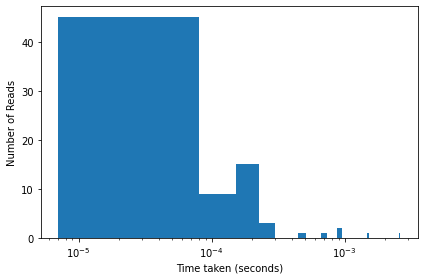

In [24]:
#now count how many of the readonly access were done:
dict_open_lines = {i:list_open_lines["read-only"].count(i) for i in list_open_lines["read-only"]}
print(dict_open_lines)

#lets look at the time taken to read the HDF objects only
rd_hdf_obj = []
temp_list = list_open_lines["read-only"]

for i in range(0,len(temp_list)):
    if temp_list[i]==3:
        rd_hdf_obj.append(list_open_t_rate["read-only"][i])
        
print(len(rd_hdf_obj))

fig, axs = plt.subplots(1, sharey=True, tight_layout=True)
#plt.yscale("log")
plt.xscale("log")
axs.set_xlabel("Time taken (seconds)")
axs.set_ylabel("Number of Reads")
axs.hist(rd_hdf_obj, bins='auto')

In [16]:
#ALL OF THESE ARE SYSTEM CALLS ACCESSING THE INTERNAL LIBRARIES/ROOT-LIBRARIES ETC.
# 3 is for the hdf5 file
#4 and 5 are for the system calls

""""
eventinfo                Dataset {3}
phi                      Dataset {8000/Inf}
phi_info                 Dataset {8}
phi_offset               Dataset {1000/Inf}
"""

'"\neventinfo                Dataset {3}\nphi                      Dataset {8000/Inf}\nphi_info                 Dataset {8}\nphi_offset               Dataset {1000/Inf}\n'

In [26]:
print("READWRITE:",list_open_lines["read-write"]," \n ","CREATE: ",list_open_lines["create"])
print("TIME TAKEN TO CREATE FILE ",list_open_t_rate["create"])

READWRITE: [3]  
  CREATE:  [3]
TIME TAKEN TO CREATE FILE  [0.000288]


INSTANCES OF WRITE  4062 4062
{544, 96, 4, 8, 40, 328, 12, 80, 272, 2096, 120}
{8: 2002, 12: 1, 4: 2000, 40: 3, 328: 3, 544: 3, 120: 3, 80: 2, 272: 4, 2096: 39, 96: 2}
1e-05 2.1e-05


(array([2.001e+03, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([1.000e-05, 7.080e-05, 1.316e-04, 1.924e-04, 2.532e-04, 3.140e-04]),
 <BarContainer object of 5 artists>)

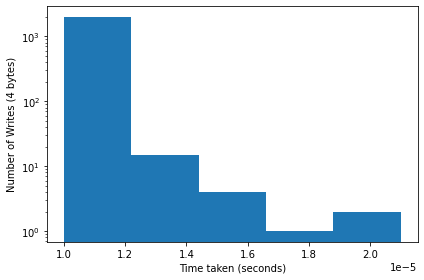

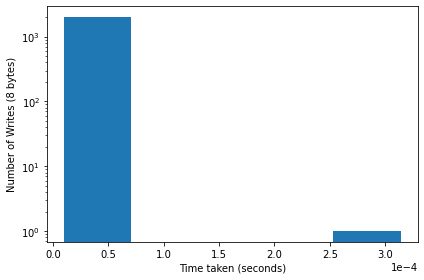

In [91]:
#now need to find out how many times the write function is called
f.seek(0)
write_counter=0
list_bytes_write=[]
list_write_proc=[]
for line in f:
    if "write(" in line:
        if "3," in line:
            write_counter+=1
            #I now want to categorize in terms of bytes written. 
            new_line = line.split("=")
            #print(new_line[0]," AND ",new_line[1])
            val = len(new_line)-1
            num = new_line[val].replace(" ","")
            num = num.replace("\n","")
            if "<" not in num and ">" not in num:
                continue
            temp_line = new_line[val].replace("\n","")
            temp_line = temp_line.replace(" ","")
            
            list_temp_line = list(temp_line)
            s_index = list_temp_line.index("<")
            e_index = list_temp_line.index(">")
            #print(list_temp_line[s_index-1])
            bytes_written = ""
            for i in range(0,s_index):
                bytes_written += list_temp_line[i]
            #print("bytes write ",bytes_written,len(list_temp_line))
            t_rate = ""
            for i in range(s_index+1,e_index):
                t_rate += list_temp_line[i]
            try:
                int_bytes = int(bytes_written)
                f_w_rate = float(t_rate)
            except:
                #print(new_line[1],line)
                continue
            list_bytes_write.append(int_bytes)
            list_write_proc.append(f_w_rate)
            
            
print("INSTANCES OF WRITE ",write_counter,len(list_bytes_write))

#first find the different process indices
set_write = set(list_bytes_write)
print(set_write)
#count how many times each of these bytes are written:
dict_bytes_write = {i:list_bytes_write.count(i) for i in list_bytes_write}
print(dict_bytes_write)

#first we will put together the information for the 4 and 8 bytes write.
dict_list_bytes = {"4":[],
                   "8":[]
}

for i in range(0,len(list_bytes_write)):
    if list_bytes_write[i]==4:
        dict_list_bytes["4"].append(list_write_proc[i])
    if list_bytes_write[i]==8:
        dict_list_bytes["8"].append(list_write_proc[i])
        
#print(dict_list_bytes["8"])
print(min(dict_list_bytes["4"]),max(dict_list_bytes["4"]))
fig, axs = plt.subplots(1, sharey=True, tight_layout=True)
plt.yscale("log")
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
#plt.xscale("log")
axs.set_xlabel("Time taken (seconds)")
axs.set_ylabel("Number of Writes (4 bytes)")
axs.hist(dict_list_bytes["4"], bins=5)



fig, axs = plt.subplots(1, sharey=True, tight_layout=True)
plt.yscale("log")
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
#plt.xscale("log")
axs.set_xlabel("Time taken (seconds)")
axs.set_ylabel("Number of Writes (8 bytes)")
axs.hist(dict_list_bytes["8"], bins=5)

In [11]:
#Note that we were reading 1000 events from a single branch...so why 2002:
"""
write(3, "\0\0\0\0\0\0\0\0", 8)         = 8
write(3, "\0\0\0 \33\244\212?", 8)      = 8

The dump shows that the write operation is happening 2 times. Once a buffer of 0 is written and the second time something 
actually is being written. Why is an empty buffer being written each time.
The additional 2 is for the _info data-set which still stores the character

Byte size 4 is written for the offset_info which are saved as integers. Again the system calls the write function twice.


2096 bytes are written 39 times:
write(3, "TREE\1\09\0\210O\1\0\0\0\0\0Hp\1\0\0\0\0\0\10\0\0\0\0\0\0\0"..., 2096) = 2096
write(3, "TREE\1\09\0\270W\1\0\0\0\0\0xx\1\0\0\0\0\0\4\0\0\0\0\0\0\0"..., 2096) = 2096

544 bytes are written 3 times:
write(3, "TREE\0\0\1\0\377\377\377\377\377\377\377\377\377\377\377\377\377\377\377\377\0\0\0\0\0\0\0\0"..., 544) = 544
write(3, "TREE\0\0\1\0\377\377\377\377\377\377\377\377\377\377\377\377\377\377\377\377\0\0\0\0\0\0\0\0"..., 544) = 544
write(3, "TREE\0\0\1\0\377\377\377\377\377\377\377\377\377\377\377\377\377\377\377\377\0\0\0\0\0\0\0\0"..., 544) = 544

328 bytes are written 3 times.
write(3, "SNOD\1\0\1\0\10\0\0\0\0\0\0\0 \3\0\0\0\0\0\0\1\0\0\0\0\0\0\0"..., 328) = 328
write(3, "SNOD\1\0\1\0\10\0\0\0\0\0\0\0x\7\0\0\0\0\0\0\1\0\0\0\0\0\0\0"..., 328) = 328

120 bytes are written 3 times:
write(3, "HEAP\0\0\0\0X\0\0\0\0\0\0\0\20\0\0\0\0\0\0\0\310\2\0\0\0\0\0\0"..., 120) = 120
write(3, "HEAP\0\0\0\0X\0\0\0\0\0\0\0\20\0\0\0\0\0\0\0\210\5\0\0\0\0\0\0"..., 120) = 120
write(3, "HEAP\0\0\0\0X\0\0\0\0\0\0\0@\0\0\0\0\0\0\0\340\t\0\0\0\0\0\0"..., 120) = 120


"""


'\nwrite(3, "\x00\x00\x00\x00\x00\x00\x00\x00", 8)         = 8\nwrite(3, "\x00\x00\x00 \x1b¤\x8a?", 8)      = 8\n\nThe dump shows that the write operation is happening 2 times. Once a buffer of 0 is written and the second time something \nactually is being written. Why is an empty buffer being written each time.\nThe additional 2 is for the _info data-set which still stores the character\n\nByte size 4 is written for the offset_info which are saved as integers. Again the system calls the write function twice.\n\n\n2096 bytes are written 39 times:\nwrite(3, "TREE\x01\x009\x00\x88O\x01\x00\x00\x00\x00\x00Hp\x01\x00\x00\x00\x00\x00\x08\x00\x00\x00\x00\x00\x00\x00"..., 2096) = 2096\nwrite(3, "TREE\x01\x009\x00¸W\x01\x00\x00\x00\x00\x00xx\x01\x00\x00\x00\x00\x00\x04\x00\x00\x00\x00\x00\x00\x00"..., 2096) = 2096\n\n544 bytes are written 3 times:\nwrite(3, "TREE\x00\x00\x01\x00ÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿ\x00\x00\x00\x00\x00\x00\x00\x00"..., 544) = 544\nwrite(3, "TREE\x00\x00\x01\x00ÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿ\x00\